In [1]:
!pip install tensorflow

In [2]:
!pip install matplotlib

In [9]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
from pylab import *

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Loading the Data

In [5]:
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 100000 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
#len(batch) = 2
#batch[0].shape = (32, 256, 256, 3)

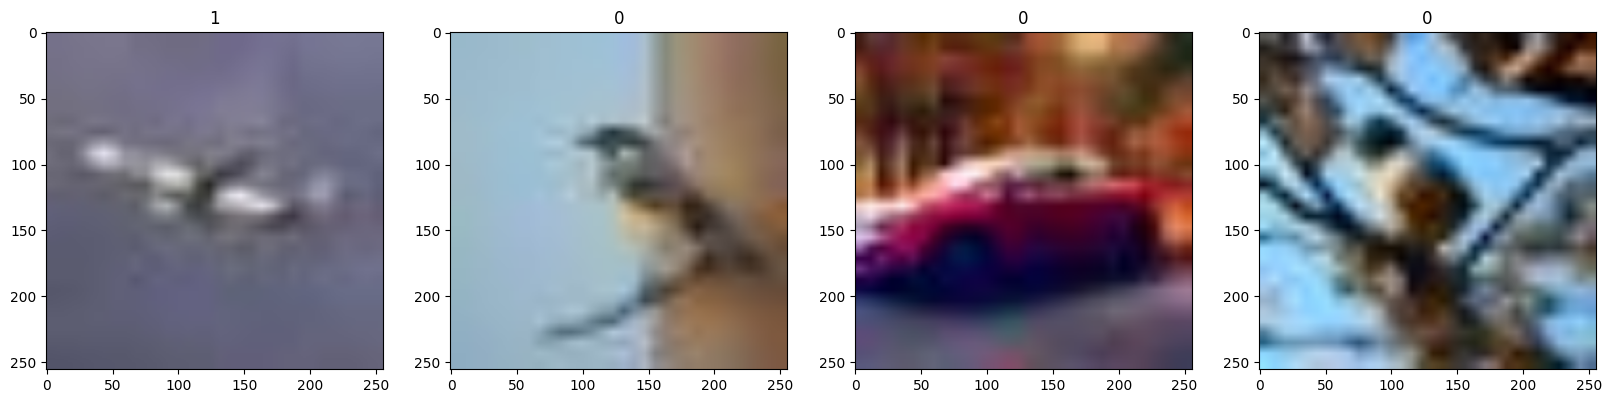

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling the Data

In [8]:
data = data.map(lambda x,y : (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

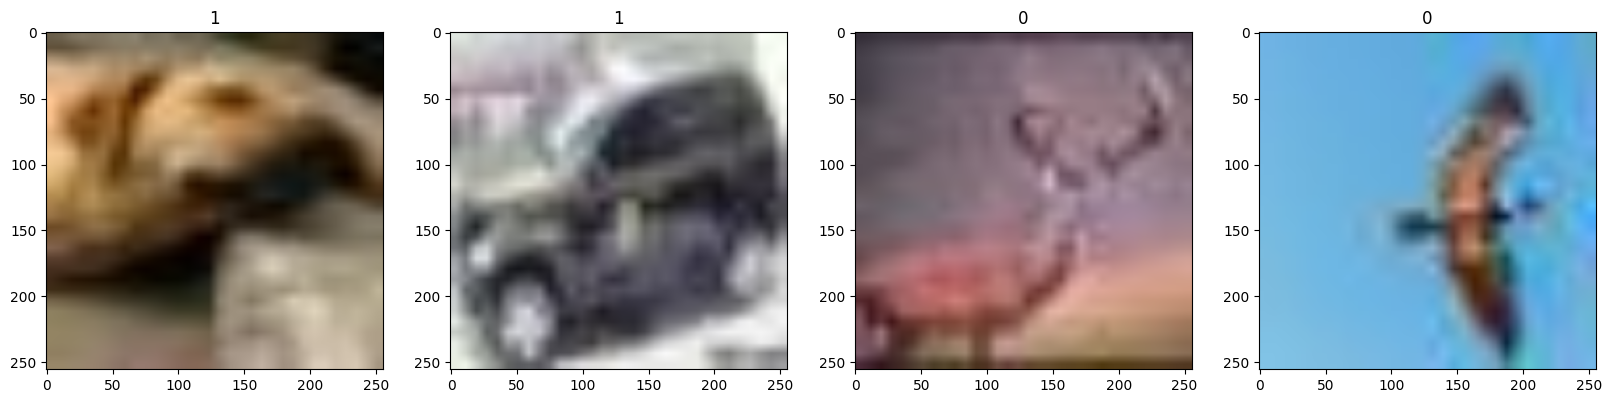

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [10]:
len(data)

3125

In [11]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())


model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [16]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training

In [18]:
logdir = 'logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [20]:
hist = model.fit(train, epochs = 8, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/8


2187/2187 [==============================] - 1026s 466ms/step - loss: 0.3713 - accuracy: 0.8300 - val_loss: 0.2868 - val_accuracy: 0.8816
Epoch 2/8
2187/2187 [==============================] - 971s 444ms/step - loss: 0.2442 - accuracy: 0.8987 - val_loss: 0.2342 - val_accuracy: 0.9042
Epoch 3/8
2187/2187 [==============================] - 896s 409ms/step - loss: 0.1847 - accuracy: 0.9256 - val_loss: 0.2074 - val_accuracy: 0.9183
Epoch 4/8
2187/2187 [==============================] - 823s 376ms/step - loss: 0.1403 - accuracy: 0.9453 - val_loss: 0.2217 - val_accuracy: 0.9190
Epoch 5/8
2187/2187 [==============================] - 929s 425ms/step - loss: 0.1011 - accuracy: 0.9619 - val_loss: 0.2524 - val_accuracy: 0.9166
Epoch 6/8
2187/2187 [==============================] - 856s 391ms/step - loss: 0.0702 - accuracy: 0.9737 - val_loss: 0.2967 - val_accuracy: 0.9083
Epoch 7/8
2187/2187 [==============================] - 834s 381ms/step - loss: 0.0566 - accuracy: 0.9787 - val_loss

## Plotting Perfomance

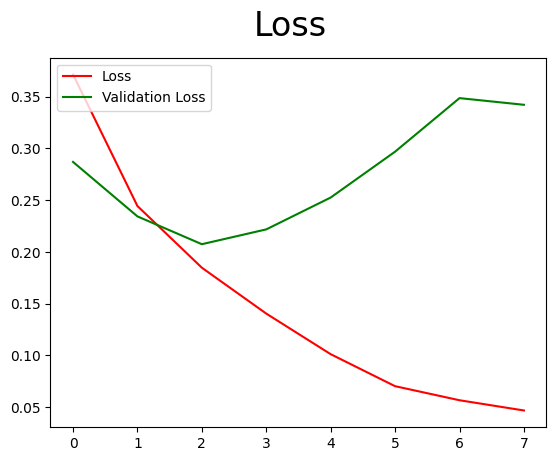

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'green', label = 'Validation Loss')
fig.suptitle('Loss', fontsize = 24)
plt.legend(loc = 'upper left')
plt.show()

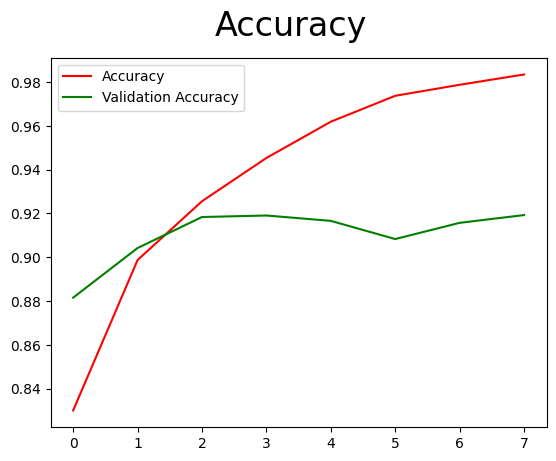

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'green', label = 'Validation Accuracy')
fig.suptitle('Accuracy', fontsize = 24)
plt.legend(loc = 'upper left')
plt.show()

## Evaluating Perfomance

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [29]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 112ms/step


In [30]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 0.9230769276618958, Recall: 0.9165017604827881, Accuracy: 0.9190705418586731


## Testing

In [10]:
import cv2

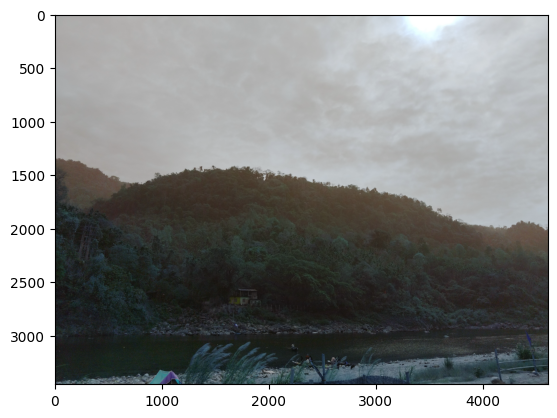

In [11]:
img = cv2.imread('img.jpg')
plt.imshow(img)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

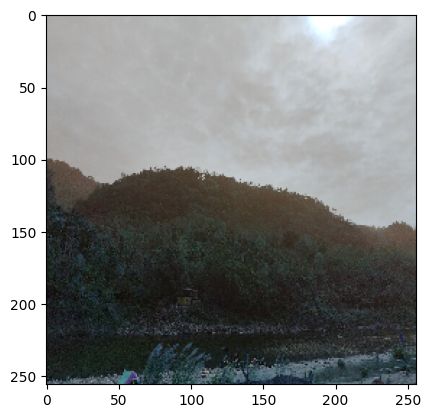

In [12]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [15]:
import pickle
with open('classifier.pkl', 'rb') as f:
    model = pickle.load(f)

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat




1/1 [==============================] - 1s 986ms/step


array([[1.11797765e-10]], dtype=float32)

In [16]:
if yhat > 0.5:
    print('The image is real.')
else: 
    print('The image is AI-generated')

The image is AI-generated


## Saving the Model

In [26]:
from tensorflow.keras.models import load_model

In [28]:
tf.keras.models.save_model(model, 'AIImageClassifier.hdf5')
model.save('my_model')

C:\Users\lavan\AppData\Local\Temp\ipykernel_11548\1772596285.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, 'AIImageClassifier.hdf5')


INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [35]:
# pickling the model 
import pickle 
pickle_out = open("classifier.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()
